In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, roc_curve
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [23]:
# Loading the csv file
df = pd.read_csv(r'C:\Users\sravy\Desktop\DSA Data Set.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

In [24]:
# dropping duplicate rows
duplicates = df[df.duplicated(keep= 'last')]
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0.945200,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0.956465,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.956728,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.961048,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0.955202,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0.970002,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0.956788,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0.932301,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0.842341,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.827244,no


In [25]:
df = df.drop_duplicates()

In [26]:
#Numerical data
print(df["age"].value_counts())
print(df["duration"].value_counts())
print(df["pdays"].value_counts())
print(df["nr.employed"].value_counts())

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
85      170
90      170
136     168
73      167
124     163
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64
5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64


In [27]:
# dropping columns which are not useful
df=df.drop(labels=['pdays','duration','ModelPrediction'],axis=1)

In [28]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  previous        41176 non-null  int64  
 12  poutcome        41176 non-null  object 
 13  emp.var.rate    41176 non-null  float64
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  nr.employed     41176 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


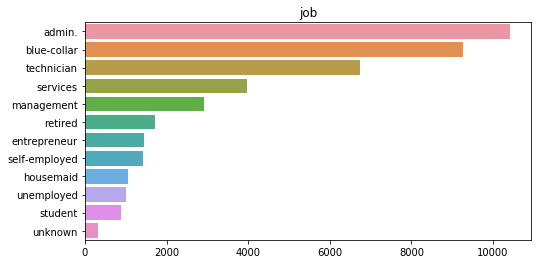

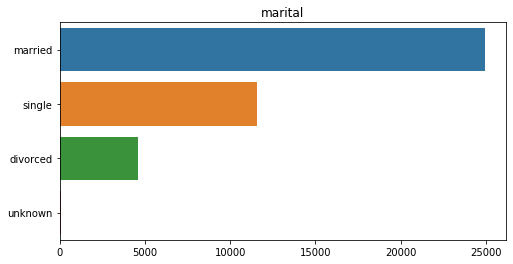

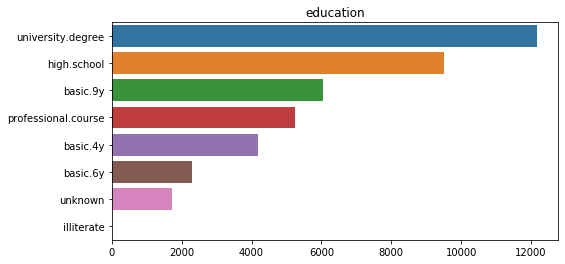

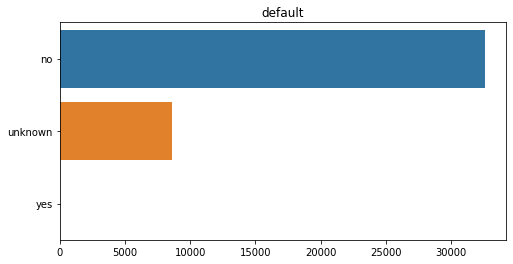

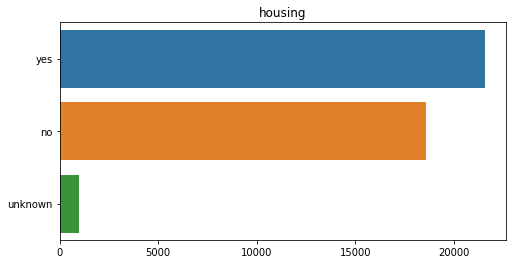

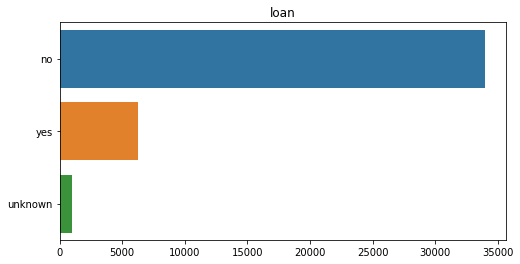

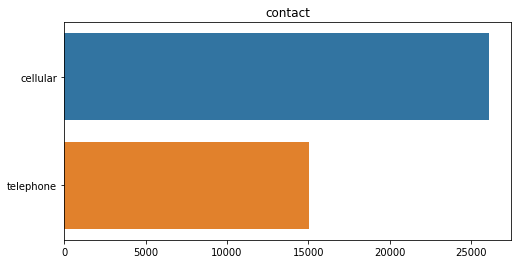

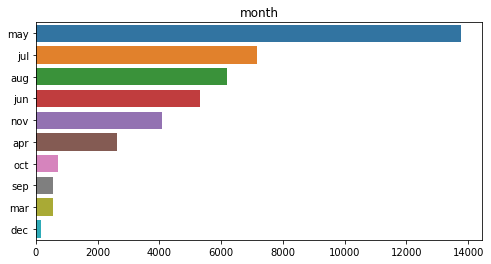

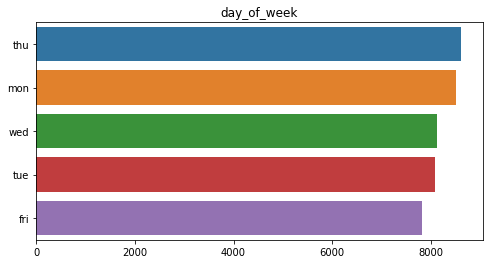

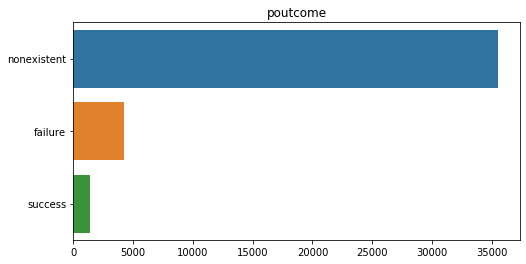

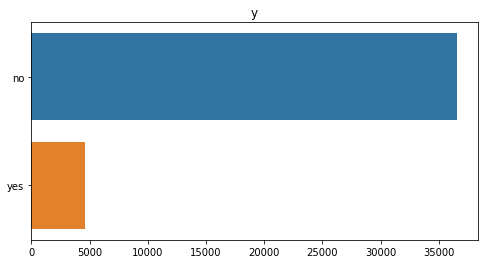

In [29]:
# visualization of categorical data
categorcial = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial:
    plt.figure(figsize=(8,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)

In [30]:
# replacing yes with 1 and no with 0
df.y.replace(('yes','no'),(1,0),inplace=True)

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [32]:
# using get_dummies one hot encoding the categorical columns
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   campaign                       41176 non-null  int64  
 2   previous                       41176 non-null  int64  
 3   emp.var.rate                   41176 non-null  float64
 4   cons.price.idx                 41176 non-null  float64
 5   cons.conf.idx                  41176 non-null  float64
 6   euribor3m                      41176 non-null  float64
 7   nr.employed                    41176 non-null  float64
 8   y                              41176 non-null  int64  
 9   job_admin.                     41176 non-null  uint8  
 10  job_blue-collar                41176 non-null  uint8  
 11  job_entrepreneur               41176 non-null  uint8  
 12  job_housemaid                  41176 non-null 

In [34]:
#seperating class and independant variables
X=df.drop('y',axis=1)
y=df['y']

In [35]:
#split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(df.columns)

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',

In [36]:
#training on Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state = 42)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
#predicting target values
rfy_predicted = RF.predict(X_test)
accuracy = accuracy_score(y_test, rfy_predicted)#accuracy score
print(f'Out-of-bag score estimate: {RF.oob_score_:.3}')
print(f'Accuracy score: {accuracy:.3}')
#predicting class probability of test data
Rf_pred = RF.predict_proba(X_test)
#compute AUC score
AUC_scoreRF = roc_auc_score(y_test, Rf_pred[:,1])
print(f'AUC score: {AUC_scoreRF}')

Out-of-bag score estimate: 0.892
Accuracy score: 0.891
AUC score: 0.7741014268809611


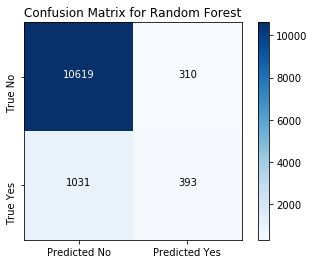

In [38]:
# confusion matrix on the test data
confusionMatrix = confusion_matrix(y_test,rfy_predicted).ravel()
plt.figure()
plt.title('Confusion Matrix for Random Forest')
confusionMatrix=np.reshape(confusionMatrix,(2,2))
plt.imshow(confusionMatrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted No','Predicted Yes'])
plt.yticks(tick_marks, ['True No','True Yes'], rotation='vertical')
thresh = confusionMatrix.max() / 2.
for i, j in itertools.product(range(confusionMatrix.shape[0]), range(confusionMatrix.shape[1])):
    plt.text(j, i, confusionMatrix[i, j],horizontalalignment="center",color="white" if confusionMatrix[i, j] > thresh else "black")
plt.show()

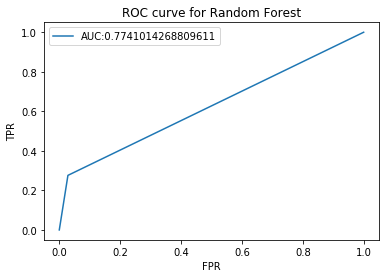

In [39]:
# Visualizing Receiver Operating Characteristic on RandomForest
fpr, tpr, threshold = roc_curve(y_test, rfy_predicted)
plt.figure()
plt.plot(fpr,tpr,label="AUC:"+str(AUC_scoreRF)) 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Random Forest')
plt.legend(loc=2)
plt.show()

In [40]:
# training on Logistic Regression
LR = LogisticRegression(class_weight = 'balanced')
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#predicting target values
y_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)#accuracy
y_predtrain = LR.predict(X_train)
#predicting class probability of test data
LR_pred = LR.predict_proba(X_test)
print(f'Accuracy score: {accuracy:.3}')
#compute AUC score
AUC_scoreLR = roc_auc_score(y_test, LR_pred[:,1])
print(f'AUC score: {AUC_scoreLR}')

Accuracy score: 0.811
AUC score: 0.7871685000015421


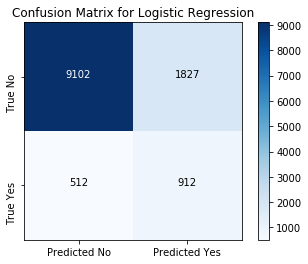

In [45]:
# confusion matrix on the test data
confusionMatrix = confusion_matrix(y_test,y_pred).ravel()
plt.figure()
plt.title('Confusion Matrix for Logistic Regression')
confusionMatrix=np.reshape(confusionMatrix,(2,2))
plt.imshow(confusionMatrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted No','Predicted Yes'])
plt.yticks(tick_marks, ['True No','True Yes'], rotation='vertical')
thresh = confusionMatrix.max() / 2.
for i, j in itertools.product(range(confusionMatrix.shape[0]), range(confusionMatrix.shape[1])):
    plt.text(j, i, confusionMatrix[i, j],horizontalalignment="center",color="white" if confusionMatrix[i, j] > thresh else "black")
plt.show()

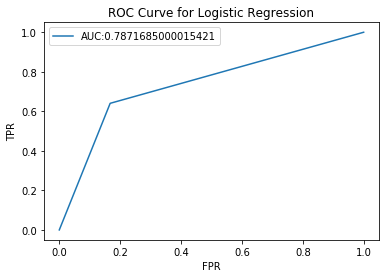

In [46]:
# Visualizing Receiver Operating Characteristic on Logistic Regression
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr,tpr,label="AUC:"+str(AUC_scoreLR)) 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc=2)
plt.show()

In [47]:
# creating list of column labels
cols=list(df.columns)
cols.remove('y')
cols

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_

In [49]:
feature_importances = pd.DataFrame(RF.feature_importances_,
                                   index = cols,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
age,0.153377
euribor3m,0.125215
campaign,0.079711
nr.employed,0.048834
poutcome_success,0.030961


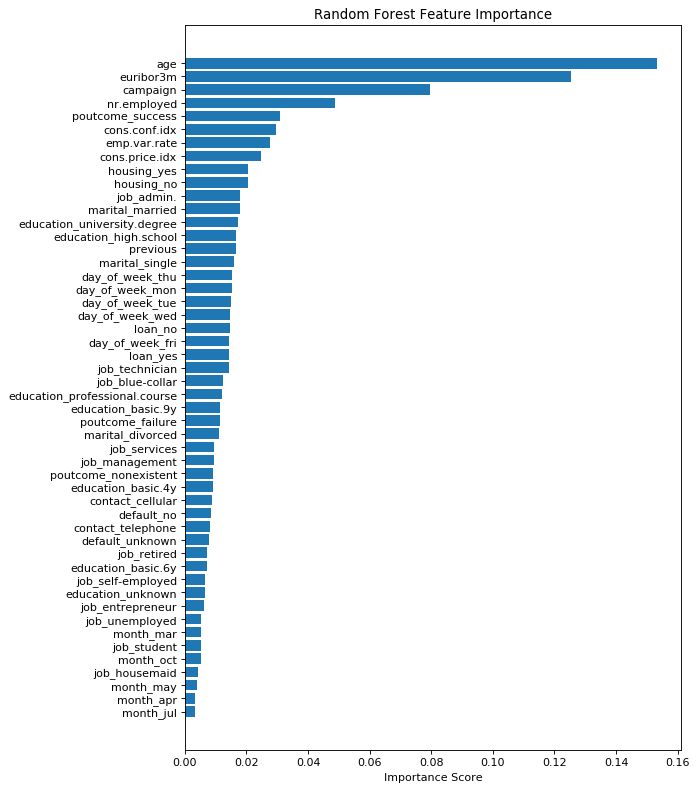

In [50]:
# Using feature_importances_ attribute get the feature importance and plot it
Columns = np.min([50, len(cols)])
FeatureNames = np.arange(Columns)
feature_values = feature_importances.iloc[:Columns].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:Columns].index)[::-1]
plt.figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k');
plt.barh(FeatureNames, feature_values, align = 'center')
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.yticks(FeatureNames, feature_labels)
plt.show()


In [51]:
# get feature importances from Linear Regression model
feature_importances = pd.DataFrame(LR.coef_[0],
                                   index = cols, 
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
cons.price.idx,0.529588
month_jul,0.239529
contact_cellular,0.223124
poutcome_success,0.220875
marital_single,0.123590


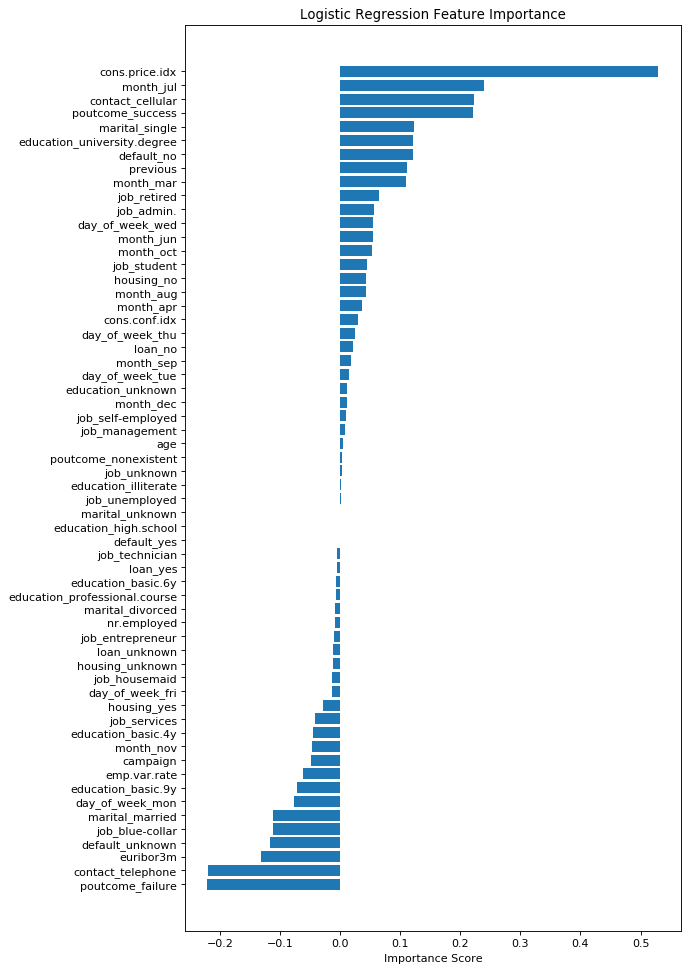

In [52]:
#Visualizing the feature importance of LR using bar graph
Columns = np.min([60, len(cols)])
FeatureNames = np.arange(Columns)
feature_values = feature_importances.iloc[:Columns].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:Columns].index)[::-1]
plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(FeatureNames, feature_values, align = 'center')
plt.xlabel('Importance Score')
plt.title('Logistic Regression Feature Importance')
plt.yticks(FeatureNames, feature_labels)
plt.show()